# **1. Setup Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso

# 2. **Loading Dataset**

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1ucX1Ja8xsyDOjPV3JGiEBZMsUT1pFPXB7G7d9C25p70/edit#gid=1185419871'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
test_ex2 = pd.read_csv(url_1, header = 0, encoding = 'utf8')
test_ex2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,3.39,17850.0,United Kingdom


# **3. Cleaning & Preparation Dataset**

In [3]:
def overview(df):
    
    print('OVERVIEW DATASET\n')
    
    print('Shape of the data (rows, columns):')
    print(df.shape,
          '\n------------------------------------------------------------------------------------\n')
    
    print('All columns from the dataframe :')
    print(df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('Datatpes and Missing values:')
    print(df.info(), 
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df.columns:
        print('Unique values in {} :'.format(col),len(df[col].unique()))
    print('\n------------------------------------------------------------------------------------\n')
    
    print('Summary data :')
    print(df.describe(include = 'all'), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('Number of duplicate values :')
    print(df.duplicated().sum())
    
overview(test_ex2)

OVERVIEW DATASET

Shape of the data (rows, columns):
(541909, 8) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatpes and Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64


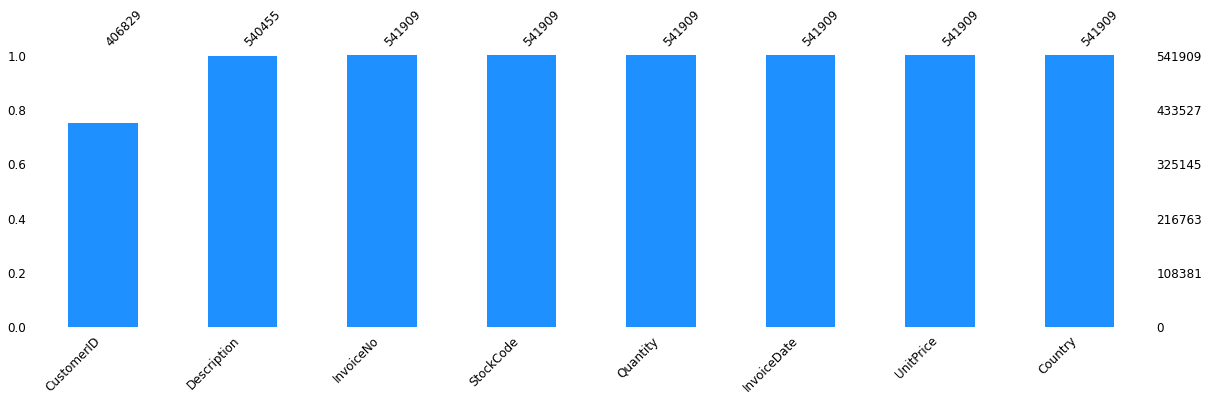

In [4]:
# % nan values in data

print(round(100*(test_ex2.isna().sum())/len(test_ex2), 2))
mso.bar(test_ex2, figsize = (20,5), fontsize = 12, color = 'dodgerblue', sort = 'ascending');

In [5]:
test_ex2.dropna(inplace = True)

In [6]:
# Recheck
print(test_ex2.isna().sum())
print('--' * 10)
print(test_ex2.shape)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
--------------------
(406829, 8)


In [7]:
test_ex2['InvoiceDate'] = pd.to_datetime(test_ex2['InvoiceDate'], format='%d-%m-%Y %H:%M')
test_ex2['CustomerID'] = test_ex2['CustomerID'].astype(str)

Create new cols:
- Total amount
- Number of transaction
- Last transaction

In [8]:
# Total amount

test_ex2['Total_Amount']= test_ex2['Quantity'] * test_ex2['UnitPrice']

total_amount = test_ex2['Total_Amount'].groupby(test_ex2['CustomerID']).sum()
total_amount = pd.DataFrame(total_amount).reset_index()
total_amount.head()

,CustomerID,Total_Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [9]:
# Number of transaction

transactions = test_ex2['InvoiceNo'].groupby(test_ex2['CustomerID']).count()
transaction = pd.DataFrame(transactions).reset_index()
transaction.columns = ['CustomerID', 'Number_Trans']
transaction.head()

,CustomerID,Number_Trans
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [10]:
# Last transaction

last_trans = test_ex2['InvoiceDate'].max()
test_ex2['Last_transact'] = last_trans - test_ex2['InvoiceDate']
LT = test_ex2.groupby(test_ex2['CustomerID']).min()['Last_transact']
LT = pd.DataFrame(LT).reset_index()
LT.head()

,CustomerID,Last_transact
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [11]:
# Combine all the newly created columns

df_m = pd.merge(total_amount, transaction, how = 'inner', on = 'CustomerID')
df_m = pd.merge(df_m, LT, how = 'inner', on = 'CustomerID')
df_m

,CustomerID,Total_Amount,Number_Trans,Last_transact
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00
...,...,...,...,...
4367,18280.0,180.60,10,277 days 02:58:00
4368,18281.0,80.82,7,180 days 01:57:00
4369,18282.0,176.60,13,7 days 01:07:00
4370,18283.0,2094.88,756,3 days 00:48:00


In [12]:
# Treat Last_transact columns

import datetime as dt

df_m['Last_transact'] = df_m['Last_transact'].dt.days
df_m

,CustomerID,Total_Amount,Number_Trans,Last_transact
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


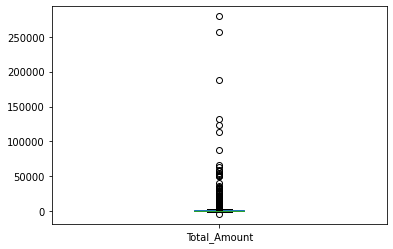

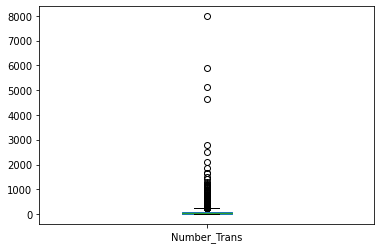

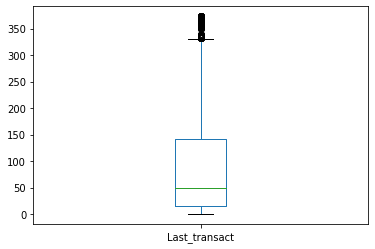

In [13]:
# Check outliers

def plot_boxplot(df, ft):
  df.boxplot(column = [ft])
  plt.grid(False)
  plt.show();

features = ['Total_Amount','Number_Trans','Last_transact']

for i in features:
    plot_boxplot(df_m, i)

In [14]:
# Treat outliers

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

index_list = []

for col in features:
  index_list.extend(outliers(df_m, col))

index_list = np.array(index_list)
print('index_list',index_list.shape)
print('df_m',df_m.shape)

index_list (952,)
df_m (4372, 4)


In [15]:
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

df_cleaned = remove(df_m, index_list)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3658 non-null   object 
 1   Total_Amount   3658 non-null   float64
 2   Number_Trans   3658 non-null   int64  
 3   Last_transact  3658 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 142.9+ KB


# **4. Building modelling**

## K-Means Clustering

In [16]:
!pip install kneed

In [17]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [18]:
# Choose features
df_mf = df_cleaned.drop('CustomerID', axis = 1)

# scale
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_mf)

# Create new dataframe
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Total_Amount','Number_Trans','Last_transact']
df_scaled.head()

,Total_Amount,Number_Trans,Last_transact
0,-1.068827,-1.028861,2.583730
1,1.248640,-0.437626,-0.183372
2,1.197461,0.418644,-0.800733
3,-0.637632,-0.723050,2.407341
4,0.923916,0.867166,-0.613320


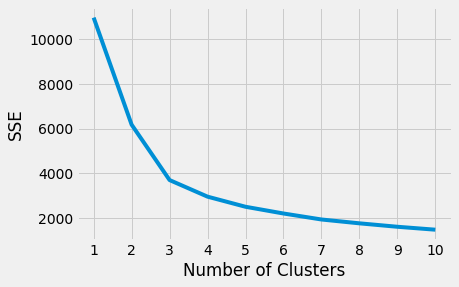


Test Elbow #1, n_clusters = 3


In [19]:
# Test 1: Elbow-curve/SSE
sse = []

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 50,
"random_state": 10,
}

for k in range(1,11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(df_scaled)
  sse.append(kmeans.inertia_)

# Visual
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show();


t1 = KneeLocator(range(1, 11), sse, curve = "convex", direction = "decreasing")

print('\nTest Elbow #1, n_clusters =', t1.elbow)

With n_clusters = 2 so silhouette score: 0.42946603688044255
With n_clusters = 3 so silhouette score: 0.44928945057684305
With n_clusters = 4 so silhouette score: 0.40312312242994147
With n_clusters = 5 so silhouette score: 0.408560739415456
With n_clusters = 6 so silhouette score: 0.36250086099167556
With n_clusters = 7 so silhouette score: 0.3392311810760822
With n_clusters = 8 so silhouette score: 0.34583426301561415
With n_clusters = 9 so silhouette score: 0.3554581041088978
With n_clusters = 10 so silhouette score: 0.3571954397916446


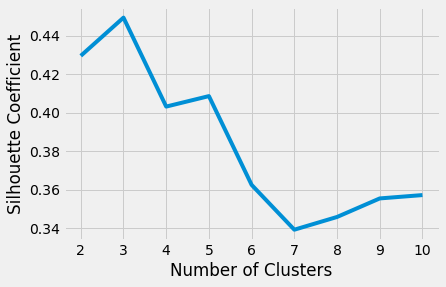


Test Elbow #2, n_clusters = 3


In [20]:
# Test 2: silhouette Coefficients

silhouette_coefficients = []

for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(df_scaled)
 score = silhouette_score(df_scaled, kmeans.labels_)
 silhouette_coefficients.append(score)
 print('With n_clusters = {0} so silhouette score: {1}'.format(k, score))

# Visual
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show();

t2 = KneeLocator(range(2, 11), silhouette_coefficients, curve = "concave", direction = "increasing")

print('\nTest Elbow #2, n_clusters =', t2.elbow)

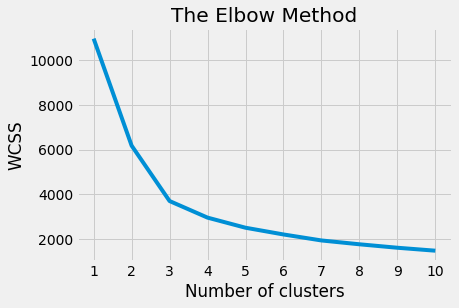


Test Elbow #3, n_clusters = 3


In [21]:
# Test 3: WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Visual
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

t3 = KneeLocator(range(1, 11), wcss, curve = "convex", direction = "decreasing")

print('\nTest Elbow #3, n_clusters =', t3.elbow)

***=> From 3 results above, I decided to choose k = 3***

In [22]:
# with k = 3

kmeans = KMeans(n_clusters = 3, **kmeans_kwargs)
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)

pred = pd.DataFrame(pred, columns = ['KMeans'])
df_mnew = df_scaled.join(pred)
df_mnew.head()

,Total_Amount,Number_Trans,Last_transact,KMeans
0,-1.068827,-1.028861,2.583730,0
1,1.248640,-0.437626,-0.183372,1
2,1.197461,0.418644,-0.800733,2
3,-0.637632,-0.723050,2.407341,0
4,0.923916,0.867166,-0.613320,2


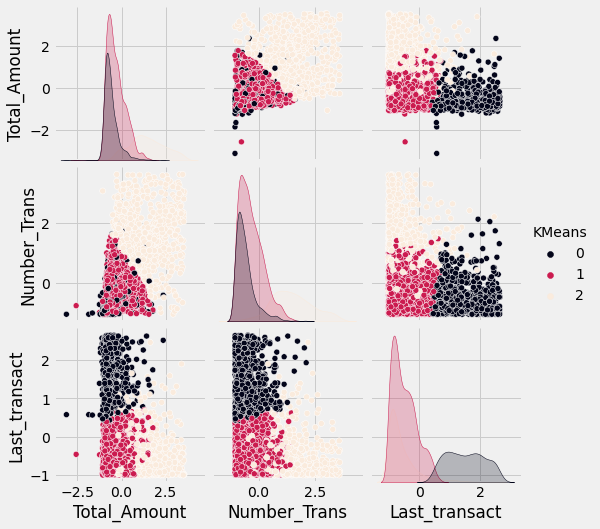

In [23]:
sns.pairplot(data = df_mnew, hue = 'KMeans', palette = 'rocket', diag_kind = 'kde');

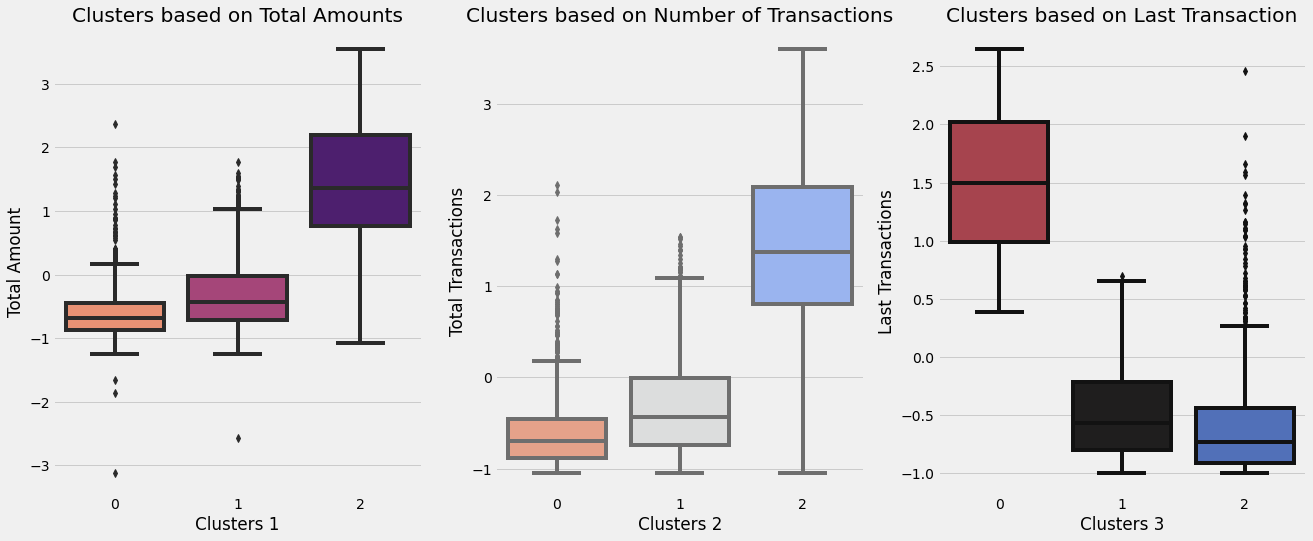

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))

ty = sns.boxplot(x = 'KMeans', y = 'Total_Amount', data = df_mnew, ax = ax[0], palette = 'magma_r')
ty.set_title('Clusters based on Total Amounts')
ty.set_ylabel('Total Amount')
ty.set_xlabel('Clusters 1');

tt = sns.boxplot(x = 'KMeans', y = 'Number_Trans', data = df_mnew, ax = ax[1], palette = 'coolwarm_r')
tt.set_title('Clusters based on Number of Transactions')
tt.set_ylabel('Total Transactions')
tt.set_xlabel('Clusters 2');

tr = sns.boxplot(x = 'KMeans', y = 'Last_transact', data = df_mnew, ax = ax[2], palette = 'icefire_r')
tr.set_title('Clusters based on Last Transaction')
tr.set_ylabel('Last Transactions')
tr.set_xlabel('Clusters 3');

## Hierarchical Clustering

In [25]:
df_scaled.head()

,Total_Amount,Number_Trans,Last_transact
0,-1.068827,-1.028861,2.583730
1,1.248640,-0.437626,-0.183372
2,1.197461,0.418644,-0.800733
3,-0.637632,-0.723050,2.407341
4,0.923916,0.867166,-0.613320


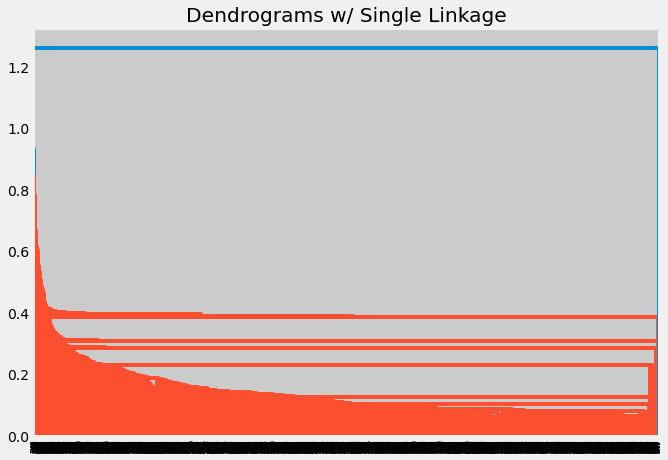

In [26]:
import scipy.cluster.hierarchy as hca

plt.figure(figsize=(10, 7))
plt.title("Dendrograms w/ Single Linkage")
dend = hca.dendrogram(hca.linkage(df_scaled, method = 'single', metric = 'euclidean'))
plt.show();

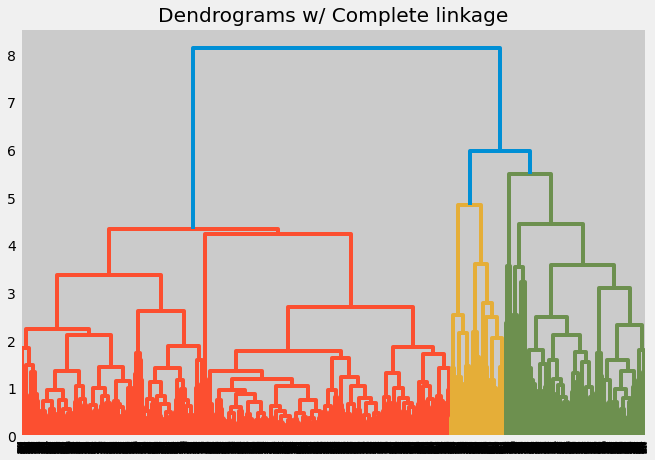

In [27]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms w/ Complete linkage")
dend = hca.dendrogram(hca.linkage(df_scaled, method = 'complete', metric = 'euclidean'))
plt.show();

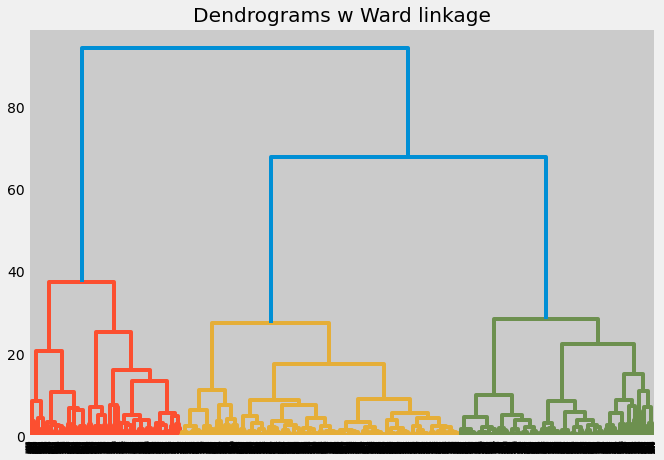

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms w Ward linkage")
dend = hca.dendrogram(hca.linkage(df_scaled, method = 'ward', metric = 'euclidean'))
plt.show();

***=> From 3 results above, I decided to choose k = 3***

In [29]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')  
hac = cluster.fit_predict(df_scaled)

hac = pd.DataFrame(hac, columns = ['HAC'])
df_mnew = df_mnew.join(hac)
df_mnew.head()

,Total_Amount,Number_Trans,Last_transact,KMeans,HAC
0,-1.068827,-1.028861,2.583730,0,1
1,1.248640,-0.437626,-0.183372,1,2
2,1.197461,0.418644,-0.800733,2,0
3,-0.637632,-0.723050,2.407341,0,1
4,0.923916,0.867166,-0.613320,2,0


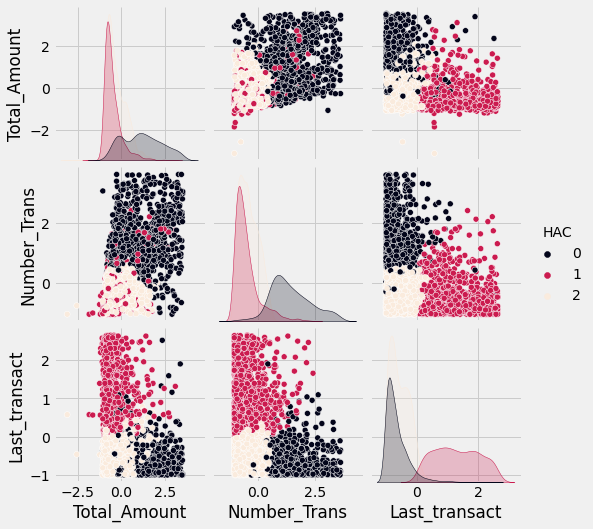

In [30]:
sns.pairplot(data = df_mnew.loc[:, df_mnew.columns != 'KMeans'], hue = 'HAC', palette = 'rocket', diag_kind = 'kde');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


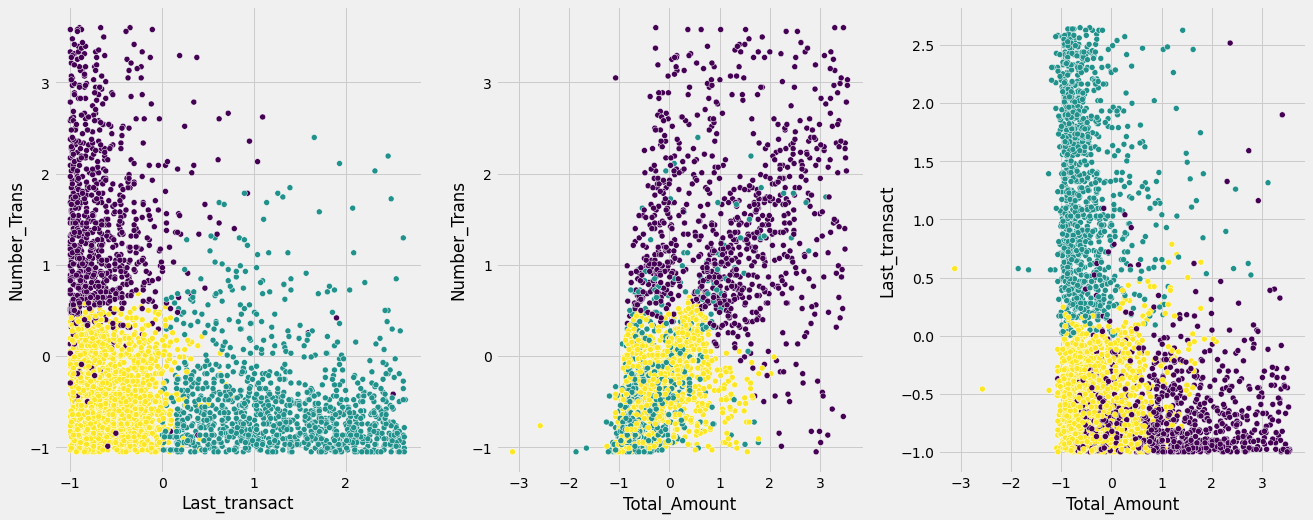

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))

scat1 = sns.scatterplot(df_mnew['Last_transact'], df_mnew['Number_Trans'], 
                        c = cluster.labels_, ax = ax[0], palette = 'magma_r');

scat2 = sns.scatterplot(df_mnew['Total_Amount'], df_mnew['Number_Trans'], 
                        c = cluster.labels_, ax = ax[1], palette = 'coolwarm_r');

scat3 = sns.scatterplot(df_mnew['Total_Amount'], df_mnew['Last_transact'], 
                        c = cluster.labels_, ax = ax[2], palette = 'icefire_r');

In [32]:
import plotly.express as px

# Convert to string
df_mnew['HAC'] = df_mnew['HAC'].astype(str)

# Visualization 3d

fig = px.scatter_3d(df_mnew, x = 'Total_Amount', y = 'Number_Trans', z = 'Last_transact', 
                    color = 'HAC', size_max = 18, opacity = 0.7);

fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

# ***5. Conclusion***

I/ K-Means Clustering with 3 n_Clusters:

* With Cluster = 1 are the customers with high amount of transactions as compared to other customers.
* With Cluster Id 1 are frequent buyers.
* With Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

* With Cluster = 1 

II/ Hierarchical Clustering with 3 Cluster Labels

* Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
* Customers with Cluster_Labels 2 are frequent buyers.
* Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.